<a href="https://colab.research.google.com/github/SofiaFraserDominique/Projeto-Imersao-Alura-Google/blob/main/Entrega%2C_imers%C3%A3o_IA_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analise de Requerimento Médico**



Este projeto tem como objetivo ajudar o paciente ou mesmo o hospital que presta serviço a encontrar o caminho certo para a continuidade do tratamento. É comum que uma simples receita ou encaminhamento seja mal interpretado e, por conta disso, o tratamento do paciente seja incorreto.

Para resolver esse problema, este projeto envolve apenas anexar o encaminhamento médico. O resultado final é uma resposta de "sim, precisa de continuidade no tratamento" e qual área médica.

Portanto, essa solução pode ajudar tanto pacientes, que não conseguem interpretar o emaranhado de informações dentro de um relatório médico, quanto hospitais, a se prepararem com o encaminhamento e oferecerem o serviço certo ao paciente certo.

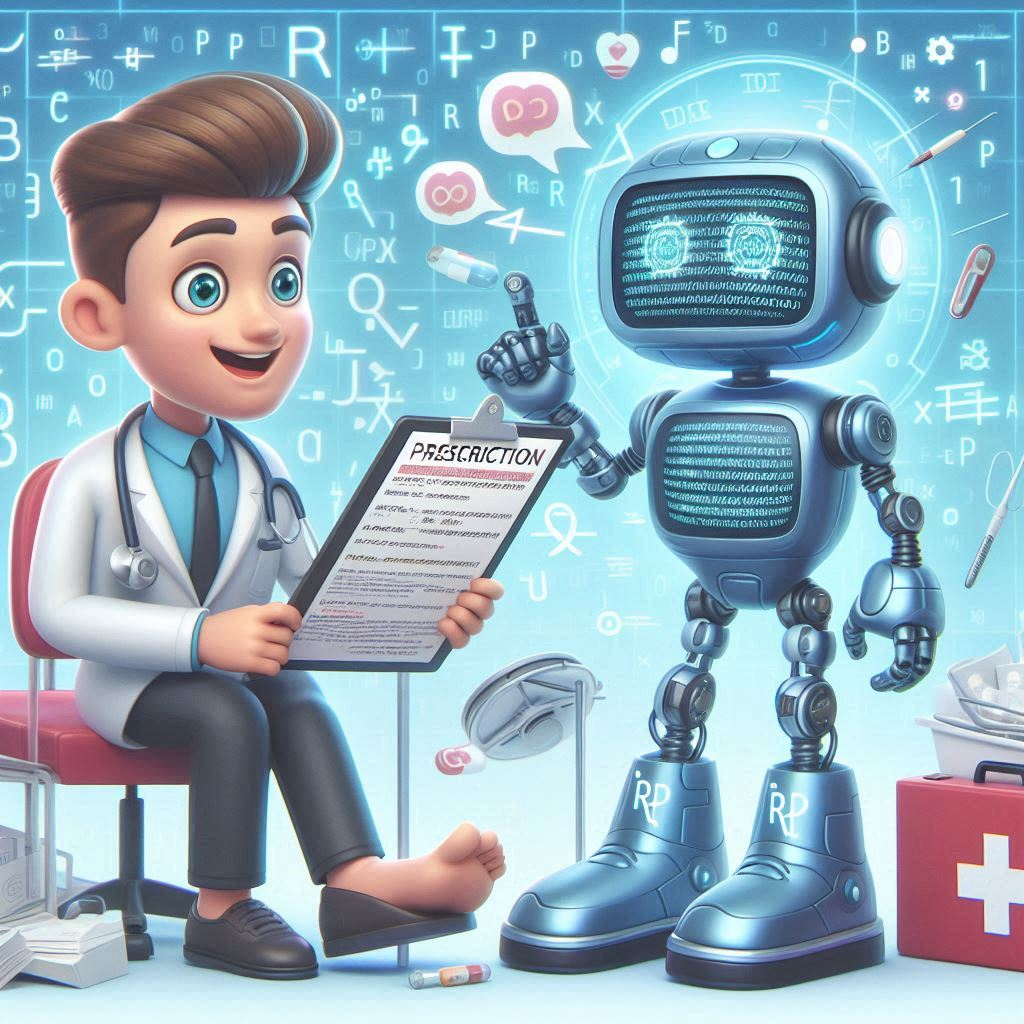

In [2]:
!pip install -q -U google-generativeai

# Imports & Configurações

In [3]:
# Imports básicos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import da API
import google.generativeai as genai
from google.colab import userdata

# Ler o secret
api_key = userdata.get("api_key_secret")

# Configurar API com o secret
genai.configure(api_key = api_key)

**Carregar modelos Necessários**

In [4]:
# Modelo de embeddings
embeddings_model = "models/embedding-001"

# Modelo de consulta
gemini_model =  genai.GenerativeModel("gemini-1.0-pro")

# Carregar dados

Carregados os dados de pedidos médicos:


In [5]:
# Ler exemplos de relatórios médicos
data_frame = pd.read_csv("exemplos.txt", sep=";")

# Adicionar embeddings ao dataframe
#data_frame["embeddings"] = data_frame.apply(lambda line: genai.embed_content(model = embeddings_model, title=line["titulo"], content=line["conteudo"], task_type= "RETRIEVAL_DOCUMENT")["embedding"], axis=1)

# Instanciando a função de consulta a pedidos hospitalares

In [6]:
# Instanciar prompt de pergunta para o modelo
consulta = """
  No relatorio medico que vou enviar a seguir, ele contem histórico médico, infomações do paciente e outras informações.
  Eu quero que você retire dos
  relatório, um possível encaminhamento, solicitação ou prescrição para outra aréa médica ou exame especifico.
  Exemplo:
  Indico Cardiologista...
  Recomendo acompanhamento com neurologistas...
  Socilito exame de imagem, Ressonância Magnética...

  Se achar algum encaminhamento externo a respota deve ser:
    Sim | Neurologia
    Sim | Ortopedia
    Sim | Cardiologia

  Se não encontrar encaminhamento, a resposta deve ser:
    Não | Sem encaminhamento

  Responda de acordo com os exemplo acima.

  Aqui está o relatório: \n
"""

In [7]:
# Gerar dicionário de configuração menos criativo (Evitar alucinação)
generate_config = {
 "temperature": .1, # Temperatura para controlar a criatividade do modelo
 "top_k": 25, # Top K sampling
 "top_p": 0.9, # Top P sampling
}

# Carregar modelo gemini pro para consulta
gemini_pro = genai.GenerativeModel("gemini-1.0-pro")

# Pegar resposta do modelo utilizando consultas + pedidos médicos
data_frame["resposta"] = data_frame["relatório"].apply(lambda x:
  gemini_pro.generate_content(
      consulta + x, generation_config=generate_config
  ).text
)

# Dar split na resposta para separar resposta da categoria
data_frame[["Resposta", "Categoria"]] = data_frame["resposta"].str.split("|", expand=True)

# Retirar resposta completa
data_frame = data_frame.drop("resposta", axis=1)

**Mostrar proporção das respostas por categoria de atendimento:**

In [8]:
data_frame

,passagem,relatório,Resposta,Categoria
0,EABC1324,O paciente se queixa de visão turva e dificuld...,Não,Sem encaminhamento
1,FGHJ5678,Paciente apresenta quadro de dor abdominal int...,Sim,Cirurgia
2,KLMO9012,"Paciente relata queda da própria altura, com t...",Não,Sem encaminhamento
3,QRST3456,Paciente procura atendimento por quadro de tos...,Não,Sem encaminhamento
4,UVWX7890,"Paciente refere cefaleia intensa, pulsátil, un...",Não,Sem encaminhamento
5,YZAB2468,"Criança com quadro de febre alta, tosse seca e...",Não,Sem encaminhamento
6,CDFE4802,"Paciente apresenta dor lombar intensa, irradia...",Sim,Ortopedia
7,GHIJ6024,Gestante em trabalho de parto prematuro. Batim...,Não,Sem encaminhamento
8,KLMN8246,"Paciente vítima de acidente automobilístico, a...",Sim,Neurologia
9,OPQR0468,Paciente com quadro de intoxicação exógena por...,Não,Sem encaminhamento


<ipython-input-9-13d5ee61989b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data_frame, x="Categoria", palette="Blues");


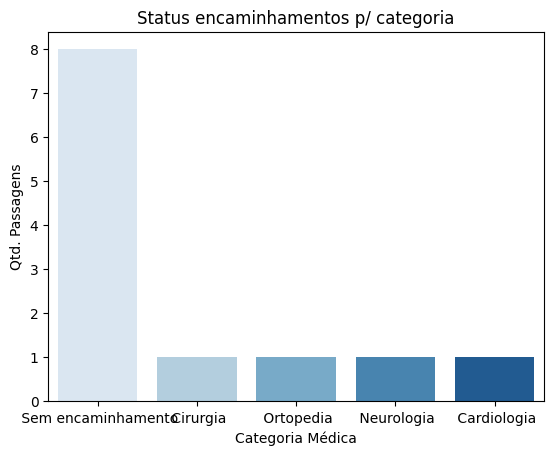

In [9]:
# Instanciar gráfico
ax = sns.countplot(data=data_frame, x="Categoria", palette="Blues");

# Configurações de aparência do gráficos
ax.set(xlabel="Categoria Médica", ylabel="Qtd. Passagens", title="Status encaminhamentos p/ categoria")
sns.set_theme(rc={"figure.figsize": (12, 12)})

# Plotar
plt.show();